# US Permanent Visa Applications - Trend Analysis and Model Building

The American Dream: a simple idea that promises success to all who reside and work hard in the land of the free and home of the brave. The notion of living in a country with social, political, and religious liberty continues to lure foreigners.

Lawful permanent residents, also known as legal permanent residents, and informally known as green card holders, are immigrants under the Immigration and Nationality Act (INA), with rights, benefits, and privileges to reside in the United States permanently.

In order to apply for a Green Card, you must be eligible under one of the categories listed below.

- Green Card through Family 
- Green Card through Employment
- Green Card as a Special Immigrant
- Green Card through Refugee or Asylee Status
- Green Card for Human Trafficking and Crime Victims
- Green Card for Victims of Abuse
- Green Card through Other Categories
- Green Card through Registry

Due to surge in number of visa appilcations and the recent political and administrative reforms a sharp increase in visa application rate is observed. Each year hundreds of thousands of people around the world apply for the immigrant (permanent residency) visa program provided by the U.S. government, however only a few thousand people succeed.

**In this notebook we try to derive some meaningful insights from the employment based US Permanent Visa Application decisions and predict the fate of visa applications based on chosen features**

There are three stages in the employment based green card process:

- PERM application filed with the DOL 
- I-140, Immigrant Petition for Alien Worker, filed with US Citizenship and Immigration Services (USCIS)
- I-485, Application for Adjustment of Status, filed with USCIS

**The data is collected and distributed by United States Divison of Labor(DOL). It covers the years of 2012 to 2017 and includes information on employer, position, wage offered, job posting history, employee education and past visa history, associated lawyers, and final decision.**

The analysis is restricted to the first stage of employment based green card i.e PERM application filed with the DOL.
Program Electronic Review Management (PERM) is an electronic processing system for filing labor certification applications with the US Department of Labor (DOL).


Import necessary packages and verify existence of data. 

In [68]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import os.path
os.path.isfile("./Data/us_perm_visas.csv")

True

### Data preprocessing ###

**Understanding structure of data**

In [29]:
#Read file from CSV
# Decision_date and case_recieved_date are read as dates
df = pd.read_csv('./Data/us_perm_visas.csv', low_memory = False, parse_dates=['decision_date', 'case_received_date'])

In [30]:
print("\033[1mNumber of Visa Applications:%s\033[0m" %len(df))
print("\033[1mNumber of Columns:%s\033[0m" %len(df.columns))
df.tail()

Number of Visa Applications:374362
Number of Columns:154


,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN
374361,NaN,Phoenix,"Fragomen, Del Rey, Bernsen & Loewy, LLP",AZ,NaN,NaN,A-16279-59292,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"84,926.00","121,500.00",Year,NaN,NaN,NaN


In [31]:
print("\033[1mColumn Names\033[0m\n")
print(df.columns.values)

Column Names

['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_completed' 'fw_info_alt_e

**Dimensionality reduction**

Remove reduandant attributes and those that do not pertain to our analysis.
    
- case_number and case_no attributes with similar information.<br>
    
    Let us verify our claim.

In [32]:
print("Length of case_number column is: ", len(df['case_number'])," with",df.case_number.isnull().sum(), "missing values\n")
print("First two values of case_number column are :")
display(df['case_number'].head(2))
print("Last two values of case_number column are :")
display(df['case_number'].tail(2))
print("Length of case_no column is: ", len(df['case_no'])," with", df.case_no.isnull().sum(),"missing values\n")
print("First two values of case_no column are :")
display(df['case_no'].head(2))
print("Last two values of case_no column are :")
display(df['case_no'].tail(2))

Length of case_number column is:  374362  with 135269 missing values

First two values of case_number column are :


0    NaN
1    NaN
Name: case_number, dtype: object

Last two values of case_number column are :


374360    A-16357-84250
374361    A-16279-59292
Name: case_number, dtype: object

Length of case_no column is:  374362  with 239093 missing values

First two values of case_no column are :


0    A-07323-97014
1    A-07332-99439
Name: case_no, dtype: object

Last two values of case_no column are :


374360    NaN
374361    NaN
Name: case_no, dtype: object

As anticipated these columns contain similar values and their "NaN" values add up to the total number of observations.
Let us create a new column containing only non missing values from both "case_number" and "case_no" attributes and copy the contents to a new column casenumber and drop the former newly created columns.

In [33]:
casenoindex = df.columns.get_loc("case_no")
casenumberindex = df.columns.get_loc("case_number")
casenumberlist = []

for value in df.iloc[0:135269,casenoindex]:
    casenumberlist.append(value)
    
for value in df.iloc[135269:374363,casenumberindex]:
    casenumberlist.append(value)
    
df['casenumber'] = casenumberlist
df.drop(df.columns[[casenoindex,casenumberindex]], axis=1, inplace=True)

- case_status

    Column contains information about decision made for respective Visa application.Get lengths of unique statues.

In [34]:
for value in df.case_status.unique():
    print(len(df[df['case_status'] == value])," applications '{}'".format(value))

181933  applications 'Certified'
25649  applications 'Denied'
148586  applications 'Certified-Expired'
18194  applications 'Withdrawn'


The observations contain some records with status == "Withdrawn" which needs to be dropped.

US permanent visa petitioners have six months time to file I-140 form (the second stage in green card process) after receiving PERM is "Certified" before it expires and turns to "Certified-Expired" status.

Since we are concerned only with the first stage of green card process( PERM certification status), let us rename Certified-Expired to Certified. This leaves us with only two case status "Certified" and "Denied"

In [35]:
#Removing all withdrawn applications
df = df[df.case_status != 'Withdrawn']

#Combining certified-expired and certified applications and displaying distribution of "case_status" variable
df.loc[df.case_status == 'Certified-Expired', 'case_status'] = 'Certified'
df.case_status.value_counts()

Certified    330519
Denied        25649
Name: case_status, dtype: int64

Only 7.2% of Visa applications were denied. Some great news there!

- Remove observations with only NaN values.

In [36]:
#Dropping all empty columns
df = df.dropna(axis=1, how='all');

#Dropping all empty rows
df = df.dropna(axis=0, how='all');

df.shape

(356168, 153)

It appears there are no rows and columns with NaN values.<br>


**Attribute Formatting**
 
 - 'pw_amount_9089' and 'pw_unit_of_pay_9089'<br>
    
    Get the structure of the attribute

In [10]:
df[['pw_amount_9089','pw_unit_of_pay_9089']].head(5).append(df[['pw_amount_9089','pw_unit_of_pay_9089']].tail(5))

,pw_amount_9089,pw_unit_of_pay_9089
0,75629.0,yr
1,37024.0,yr
2,47923.0,yr
3,10.97,hr
4,94890.0,yr
374349,"84,635.00",Year
374350,"69,098.00",Year
374351,"114,795.00",Year
374352,"112,354.00",Year
374353,"136,219.00",Year


Remove commas from the values and convert to a floating point value.<br>
The wages are hourly, weekly, bi-weekly and monthly values let us calculate the yearly equivalents to standardize the attribute values.<br>
According to the https://www.opm.gov/policy-data-oversight/pay-leave/pay-administration/fact-sheets/computing-hourly-rates-of-pay-using-the-2087-hour-divisor/, the average number of working days in USA is 250 this information is useful for our calculations.

In [38]:
#Replacing commas with whitespace character
df['pw_amount_9089'] = df['pw_amount_9089'].str.replace(",","") 

for unit in df.pw_unit_of_pay_9089.unique():
    if unit == "hr" or unit == "Hour":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 8 * 250)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year") 
    elif unit == "wk" or unit == "Week":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 50)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "mth" or unit == "Month":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 12)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "bi" or unit == "Bi-Weekly":  
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 25)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit =="yr":
         df.loc[df['pw_unit_of_pay_9089'] == unit ,'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    else:
        continue
        
#Filling missing values with median 
df['pw_amount_9089']= df['pw_amount_9089'].fillna((df['pw_amount_9089'].median()))

#Changing format from string to float
df['pw_amount_9089'] = df.pw_amount_9089.astype(float)

#Displaying 10 first values
df[['pw_amount_9089','pw_unit_of_pay_9089']].head(5).append(df[['pw_amount_9089','pw_unit_of_pay_9089']].tail(5))

,pw_amount_9089,pw_unit_of_pay_9089
0,75629.0,Year
1,37024.0,Year
2,47923.0,Year
3,21940.0,Year
4,94890.0,Year
374349,84635.0,Year
374350,69098.0,Year
374351,114795.0,Year
374352,112354.0,Year
374353,136219.0,Year


In [41]:
#Since describe(to get a summary of the attribute values) returned exponential values,converting it to floating 
#point values for better readbility
with pd.option_context('float_format', '{:.2f}'.format): print(df.pw_amount_9089.describe())

count      356168.00
mean       469624.51
std       7679620.28
min             7.50
25%         67808.00
50%         86278.00
75%        104790.00
max     495748000.00
Name: pw_amount_9089, dtype: float64


In [42]:
#Dividing our continuous income values into some categories to facilitate their visualization
df['remuneration'] = pd.cut(df['pw_amount_9089'], [0, 30000, 60000,90000,120000,150000,180000,210000,240000,270000,495748000], right=False, labels=["0-30k", "30-60k","60-90k","90-120k","120-150k","150-180k","180-210k","210-240k","240-270k","270k+"])
salary = df['remuneration'].value_counts()
salary.iloc[np.argsort(salary.index)]

0-30k        19810
30-60k       47493
60-90k      133050
90-120k     112631
120-150k     30532
150-180k      7094
180-210k      3801
210-240k       604
240-270k        29
270k+         1123
Name: remuneration, dtype: int64

**Handling Missing values**

A standard and often very good approach is to replace the missing values with mean, median or mode.

**Numerical NaNs**
For numerical values replace missing entry with mean, and if there are some outliers try median (since it is much less sensitive to them).

**Categorical NaNs**
Categorical values can be a bit trickier, one should definitely pay attention to the model performance metrics before and after editing. The standard thing to do is to replace the missing entry with the most frequent one(mode).

In [43]:
#Filling missing values in "employer_state" column with mode
df['employer_state'] = df['employer_state'].fillna(df['employer_state'].mode()[0]);

#Mapping from state name to abbreviation
state_abbrevs = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP', 
    'Palau': 'PW', 
    'Puerto Rico': 'PR', 
    'Virgin Islands': 'VI', 
    'District of Columbia': 'DC'
}

#Capitalizing Keys
us_state_abbrev = {k.upper(): v for k, v in state_abbrevs.items()}
df['employer_state'].replace(us_state_abbrev, inplace=True)
df.employer_state = df.employer_state.astype(str)


df['pw_soc_code'] = df['pw_soc_code'].str.replace('.','')
df['pw_soc_code'] = df['pw_soc_code'].str.replace('-','')
df['pw_soc_code'] = df['pw_soc_code'].astype(str).str[0:6]
df['pw_soc_code'].value_counts()

#Finding "nan" values in "pw_soc_code" column and filling them with mode
df.loc[df['pw_soc_code'] == "nan",'pw_soc_code'] = df['pw_soc_code'].mode()[0]

#Finding "None" values in "pw_soc_code" column and filling them with mode
df.loc[df['pw_soc_code'] == "None",'pw_soc_code'] = df['pw_soc_code'].mode()[0]

#Changing type from string to int
df['pw_soc_code'] = df['pw_soc_code'].astype(int)


#Replacing missing values with mode
df['class_of_admission']=df['class_of_admission'].fillna((df['class_of_admission'].mode()[0]))
df['country_of_citizenship']=df['country_of_citizenship'].fillna((df['country_of_citizenship'].mode()[0]))
df['employer_city']=df['employer_city'].fillna((df['employer_city'].mode()[0]))
df['employer_name']=df['employer_name'].fillna((df['employer_name'].mode()[0]))
df['employer_name']=df['employer_name'].astype(str).str.upper()
df['pw_source_name_9089']=df['pw_source_name_9089'].fillna((df['pw_source_name_9089'].mode()[0]))
df['remuneration']=df['remuneration'].fillna((df['remuneration'].mode()[0]))

Lets get a bird's eye view of our tidy data

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356168 entries, 0 to 374353
Columns: 154 entries, add_these_pw_job_title_9089 to remuneration
dtypes: category(1), datetime64[ns](2), float64(11), int32(1), object(139)
memory usage: 427.5+ MB


### Exploratory Data Analysis ###

Let us visualize the processed data to gain some insight into the data.

**Number of applications submitted each year from 2012 to 2017.**

[Text(0, 0.5, 'Number of Visa applicatons'),
 Text(0.5, 0, 'Visa application year')]

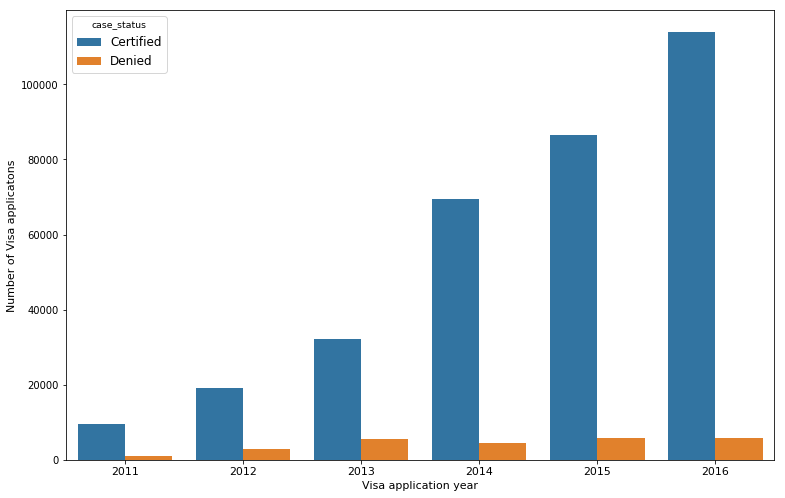

In [45]:
#Converting the date to contain just the year of application submission
#Assigning Labels to Case Status
df['year'] = df['decision_date'].dt.year

#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":12})
sns.countplot(x="year", hue="case_status", data=df)
ax.set(xlabel='Visa application year', ylabel='Number of Visa applicatons')

It's interesting that while the number of possitively considered applications increases, the number of "Denied" ones seems to be similar from year 2013. As a next step, let's see, what where the most popular cities.

Things still looking bright for us!

**Fifteen most popular cities from which the applications were filed**

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Employer city')]

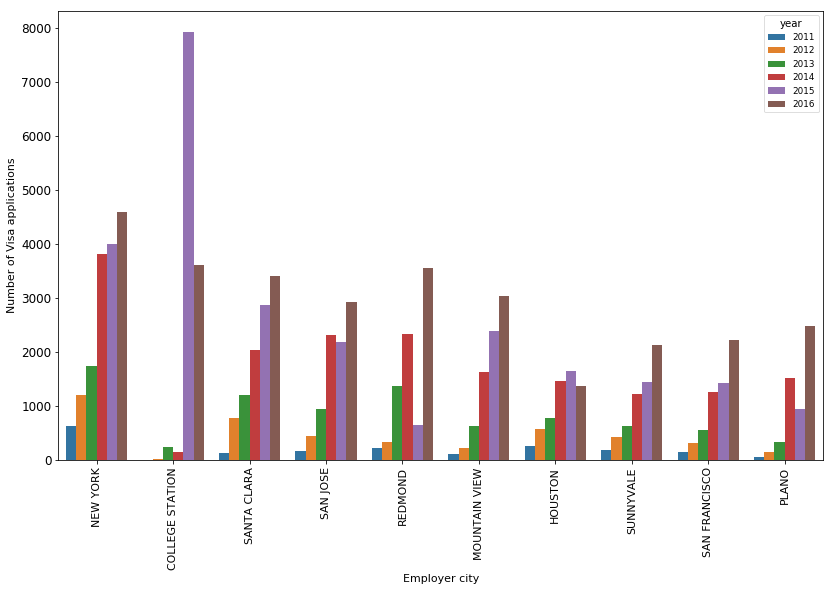

In [46]:
# Displaying 15 most popular cities
#df['employer_city'] = df['employer_city'].str.upper()
#df['employer_city'].value_counts().head(15)

# Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot(x='employer_city', hue='year', data=df, order=df.employer_city.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
ax.set(xlabel='Employer city', ylabel='Number of Visa applications')

**Number of visa applications based on country of citizenship**

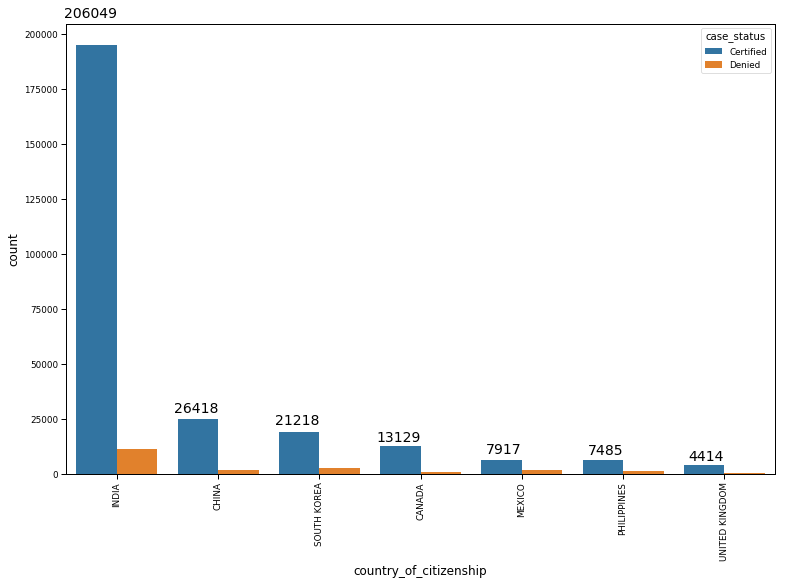

In [47]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='country_of_citizenship',hue='case_status',data=df,  
              order=df.country_of_citizenship.value_counts().iloc[:7].index)
plt.xticks(rotation=90)

#Iterating over elements in "country_of_citizenship" column and displaying counts above bars 
for i, v in df.country_of_citizenship.value_counts().head(7).reset_index().iterrows():
    ax.text(i,v.country_of_citizenship,v.unique()[1], horizontalalignment='right',verticalalignment='bottom')



**Employers who have the most number of applications filed**

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Employer name')]

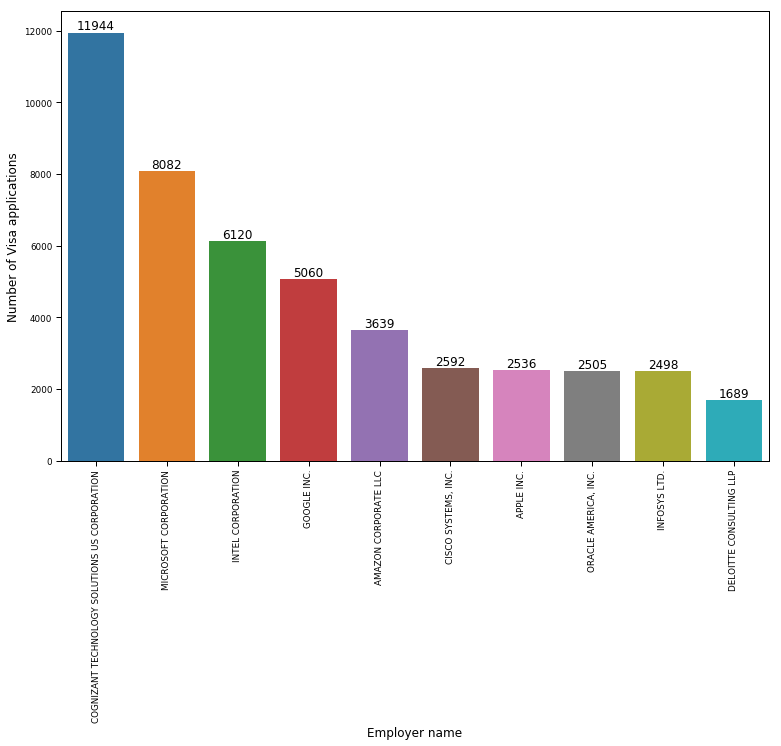

In [48]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":12,"axes.labelsize":13})
sns.countplot(x='employer_name', data=df, order=df.employer_name.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "employer_name" column and displaying counts above bars 
for i, v in df.employer_name.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.employer_name,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    
ax.set(xlabel='Employer name', ylabel='Number of Visa applications')

**Number of visa applications based on class of admission into Uinted States**

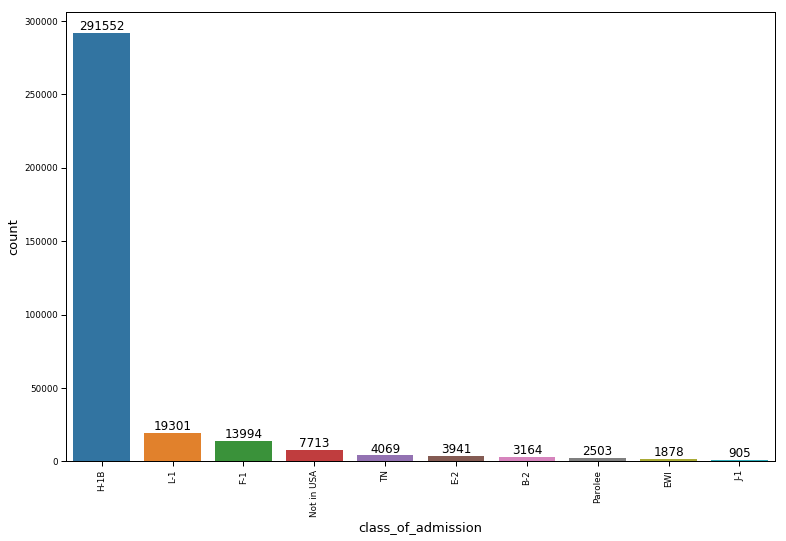

In [49]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.countplot(x='class_of_admission',data=df, 
              order=df.class_of_admission.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "class_of_admission" column and displaying counts above bars 
for i, v in df.class_of_admission.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.class_of_admission,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    

**Number of applications filed under each economic sector**

In [50]:
#Creating empty dictionary
us_economic_counts = {}

#Iterating over "us_economic_sector" column and appending values to the "us_economic_counts" dictionary
for value in df['us_economic_sector'].dropna():
    if value in us_economic_counts:
        us_economic_counts[value] += 1
    else:
        us_economic_counts[value] = 1

([<matplotlib.patches.Wedge at 0x278892c8d30>,
 [Text(-0.8119143783551594, -0.7197360920644142, 'IT'),
  Text(0.884195188218691, -0.5663028069248055, 'Other Economic Sector'),
  Text(1.0494163573953816, -0.035004411593524826, 'Aerospace'),
  Text(0.8737715453583406, 0.5822570622346264, 'Advanced Mfg'),
  Text(0.2371273511762825, 1.0228737064389328, 'Educational Services'),
  Text(-0.14734319105720087, 1.0396104963153658, 'Retail'),
  Text(-0.31051630896984056, 1.0030352046980937, 'Construction'),
  Text(-0.3984061894090864, 0.971479545971263, 'Hospitality'),
  Text(-0.4769178655021029, 0.9354407247735788, 'Automotive'),
  Text(-0.6665151122050968, 0.8113307618981468, 'Health Care')],
 [Text(-0.6996681509327872, -0.620233406525555, '45.3%'),
  Text(0.7578815899017352, -0.4854024059355476, '13.5%'),
  Text(0.899499734910327, -0.030003781365878418, '3.6%'),
  Text(0.7489470388785776, 0.499077481915394, '16.2%'),
  Text(0.20325201529395642, 0.876748891233371, '7.9%'),
  Text(-0.12629416376

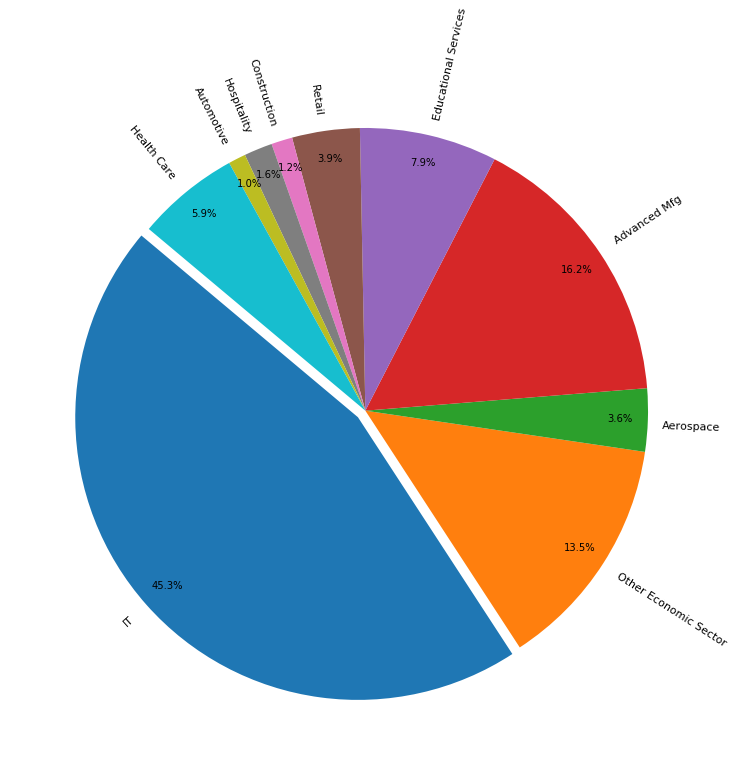

In [51]:
#Creating lists for us economic sectors and their counts
usecolabels = []
usecovalues = []
explode = (0.035, 0, 0, 0,0,0,0,0,0,0)

for key, value in us_economic_counts.items():
    usecolabels.append(key)
    usecovalues.append(value)
    
#Setting plot parameters
plt.figure(figsize=(13,13))    
sns.set_context(rc={"font.size":10,"axes.labelsize":11,"xtick.labelsize" : 11})
plt.pie(usecovalues[:10], labels=usecolabels[:10], explode = explode, autopct='%1.1f%%', pctdistance = 0.9,
          rotatelabels = 90, startangle=140, labeldistance = 1.05) 

**Number of Visa applications filed based on job titles**

In [52]:
df['job_info_job_title'].value_counts()[:20]

Software Engineer                   14372
Computer Systems Analyst - V         4747
Senior Software Engineer             3801
Computer Systems Analyst - II        3416
Software Developer                   2880
Assistant Professor                  2604
Programmer Analyst                   2534
Computer Systems Analyst - IV        2496
Systems Analyst                      2034
Software Development Engineer II     1630
Poultry Processing Worker            1594
Component Design Engineer            1064
Poultry Processor                    1037
Business Analyst                      963
software engineer                     932
SOFTWARE ENGINEER                     877
Senior Programmer Analyst             862
Sr. Software Engineer                 847
Senior Software Developer             817
Commercial Cleaner                    802
Name: job_info_job_title, dtype: int64

Since job titles contain multiple casing let us standardize them so that value_counts() gives the appropriate values.

In [53]:
#Converting values to lower case
df['job_info_job_title'] = df['job_info_job_title'].str.lower()

#Splitting job titles by '-'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.strip()
#Replacing "sr." values with "senior"
df['job_info_job_title'] = df['job_info_job_title'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
df['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


df['job_info_job_title'].value_counts(dropna=True)[:10]

software engineer                18582
computer systems analyst         12054
senior software engineer          5802
software developer                4501
programmer analyst                3763
assistant professor               2869
software development engineer     2766
systems analyst                   2587
senior programmer analyst         1884
senior software developer         1625
Name: job_info_job_title, dtype: int64

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Job Title')]

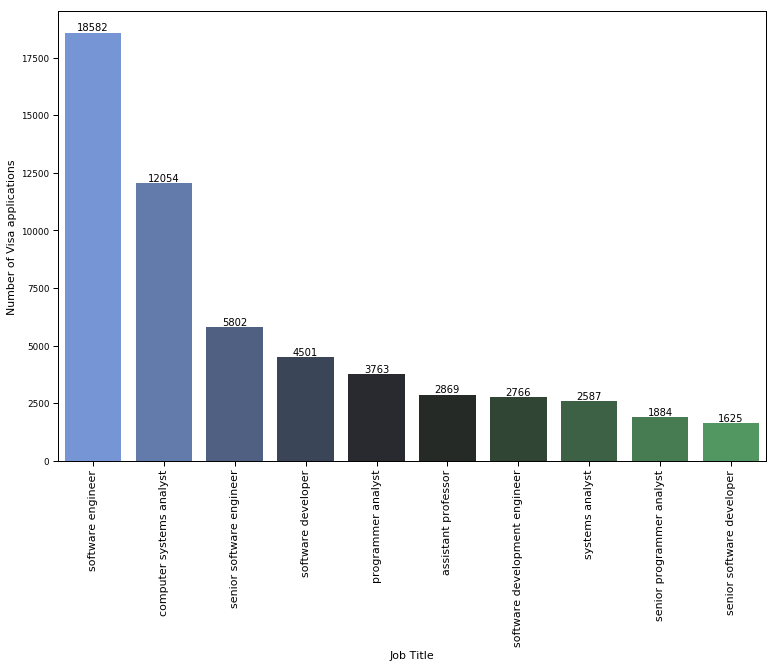

In [54]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
 #sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='job_info_job_title',data=df, 
               palette = sns.diverging_palette(255, 133, l=60, n=10, center="dark"), 
               order=df.job_info_job_title.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "job_info_job_title" column and displaying counts above bars 
for i, v in df.job_info_job_title.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.job_info_job_title,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')

#Setting label titles    
ax.set(xlabel='Job Title', ylabel='Number of Visa applications')

**Further data processing to aid in our analsysis**

**Get the percentage of not null values in our dataset**

In [56]:
#Displaying percentage of non-null values for each feature
i = 0;
for col in df.columns:
    i = i+1;
    print (i-1,"Column: '{}'".format(col),"contains ", np.round(100*df[col].count()/len(df['case_status']),decimals=2),"% non-null values" )

0 Column: 'add_these_pw_job_title_9089' contains  10.99 % non-null values
1 Column: 'agent_city' contains  56.92 % non-null values
2 Column: 'agent_firm_name' contains  55.74 % non-null values
3 Column: 'agent_state' contains  56.05 % non-null values
4 Column: 'application_type' contains  35.61 % non-null values
5 Column: 'case_received_date' contains  64.39 % non-null values
6 Column: 'case_status' contains  100.0 % non-null values
7 Column: 'class_of_admission' contains  100.0 % non-null values
8 Column: 'country_of_citizenship' contains  100.0 % non-null values
9 Column: 'country_of_citzenship' contains  5.4 % non-null values
10 Column: 'decision_date' contains  100.0 % non-null values
11 Column: 'employer_address_1' contains  99.99 % non-null values
12 Column: 'employer_address_2' contains  60.4 % non-null values
13 Column: 'employer_city' contains  100.0 % non-null values
14 Column: 'employer_country' contains  64.37 % non-null values
15 Column: 'employer_decl_info_title' contains

124 Column: 'ri_2nd_ad_newspaper_name' contains  63.74 % non-null values
125 Column: 'ri_2nd_ad_newspaper_or_journal' contains  62.71 % non-null values
126 Column: 'ri_campus_placement_from' contains  8.08 % non-null values
127 Column: 'ri_campus_placement_to' contains  8.08 % non-null values
128 Column: 'ri_coll_tch_basic_process' contains  1.91 % non-null values
129 Column: 'ri_coll_teach_pro_jnl' contains  41.29 % non-null values
130 Column: 'ri_coll_teach_select_date' contains  1.56 % non-null values
131 Column: 'ri_employee_referral_prog_from' contains  18.62 % non-null values
132 Column: 'ri_employee_referral_prog_to' contains  18.62 % non-null values
133 Column: 'ri_employer_web_post_from' contains  37.03 % non-null values
134 Column: 'ri_employer_web_post_to' contains  37.02 % non-null values
135 Column: 'ri_job_search_website_from' contains  53.29 % non-null values
136 Column: 'ri_job_search_website_to' contains  53.28 % non-null values
137 Column: 'ri_layoff_in_past_six_month

In [57]:
#Leaving columns which have more than 330000 non-missing observations
df = df.loc[:,df.count() >= 330000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356168 entries, 0 to 374353
Data columns (total 19 columns):
case_status               356168 non-null object
class_of_admission        356168 non-null object
country_of_citizenship    356168 non-null object
decision_date             356168 non-null datetime64[ns]
employer_address_1        356131 non-null object
employer_city             356168 non-null object
employer_name             356168 non-null object
employer_postal_code      356135 non-null object
employer_state            356168 non-null object
job_info_work_city        356073 non-null object
job_info_work_state       356072 non-null object
pw_amount_9089            356168 non-null float64
pw_soc_code               356168 non-null int32
pw_soc_title              353847 non-null object
pw_source_name_9089       356168 non-null object
pw_unit_of_pay_9089       354687 non-null object
casenumber                356168 non-null object
remuneration              356168 non-null catego

### Model Building ###

**Feature Selection**

In [58]:
#Assigning Labels to Case Status
df.loc[df.case_status == 'Certified', 'case_status'] = 1
df.loc[df.case_status == 'Denied', 'case_status'] = 0
df['case_status'] = df['case_status'].astype(int)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356168 entries, 0 to 374353
Data columns (total 10 columns):
case_status               356168 non-null int32
class_of_admission        356168 non-null object
country_of_citizenship    356168 non-null object
employer_city             356168 non-null object
employer_name             356168 non-null object
employer_state            356168 non-null object
pw_soc_code               356168 non-null int32
pw_source_name_9089       356168 non-null object
remuneration              356168 non-null category
year                      356168 non-null int64
dtypes: category(1), int32(2), int64(1), object(6)
memory usage: 34.8+ MB


**Data type conversion**<br>
In this step we're going to turn our feature variables into categories.

In [64]:
from sklearn.preprocessing import LabelEncoder
categorical_variables = {}

#Creating categories denoted by integers from column values
for col in df.columns:
    cat_var_name = "cat_"+ col
    cat_var_name = LabelEncoder()
    cat_var_name.fit(df[col])
    df[col] = cat_var_name.transform(df[col])    
    categorical_variables[col] = cat_var_name

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356168 entries, 0 to 374353
Data columns (total 10 columns):
case_status               356168 non-null int64
class_of_admission        356168 non-null int32
country_of_citizenship    356168 non-null int32
employer_city             356168 non-null int32
employer_name             356168 non-null int32
employer_state            356168 non-null int32
pw_soc_code               356168 non-null int64
pw_source_name_9089       356168 non-null int32
remuneration              356168 non-null int32
year                      356168 non-null int64
dtypes: int32(7), int64(3)
memory usage: 30.4 MB


**Apply Machine Learning Algorithms**

Now we will divide our final dataset into 2 dataframes. 

- First one will consist of feature variables and the second one only of our target variable - case_status. 

- Afterward we will use GridSearch object with cross-validation to find the best parameters for Logistic Regression, k-Nearest Neighbor, Random Forest and Gradient Boosting Classifiers and evaluate how well they will generalize. 

- Cross validation will split the data repeatedly using Stratified K-Folds cross-validator and train multiple models.

In [65]:
#Dividing our final dataset into features(explanatory variables) and labels(target variable)
X = df.loc[:, df.columns != 'case_status']
y = df.case_status

print("The shape of X is: {}".format(X.shape))
print("The shape of y is: {}".format(y.shape))

The shape of X is: (356168, 9)
The shape of y is: (356168,)


**Logistic Regression**

Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [66]:
#Importing Logistic Regression Classifier, GridSearchCV, train_test_split and accuracy metrics from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

#Defining fit_algorithm function
def fit_algorithm(alg, X, y, parameters, cv = 5):
    """
    This function will split our dataset into training and testing subsets, fit cross-validated 
    GridSearch object, test it on the holdout set and return some statistics
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
    grid = GridSearchCV(alg, parameters, cv = cv)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    confmat = confusion_matrix(y_test,y_pred)

    return pd.Series({
        "Train_ACC": np.around(grid.best_score_, decimals=2).astype(str),
        "Test_ACC": np.around(grid.score(X_test, y_test), decimals=2).astype(str),
        "P": np.around(precision_score(y_pred, y_test), decimals=2).astype(str),
        "R": np.around(recall_score(y_pred, y_test),decimals=2).astype(str),
        "F1": np.around(f1_score(y_pred, y_test),decimals=2).astype(str),
        "Best_params": [grid.best_params_],
        "True negatives": confmat[0,0],
        "False negatives": confmat[1,0],
        "True positives": confmat[1,1],
        "False positives": confmat[0,1]
        })

In [67]:
#To perform hyper parameter optimisation a list of multiple elements will be entered and the optimal 
#value in that list will be picked using Grid Search object
logreg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }

logreg = fit_algorithm(LogisticRegression(),X,y,logreg_params)
logreg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Train_ACC                0.93
Test_ACC                 0.93
P                         1.0
R                        0.93
F1                       0.96
Best_params        [{'C': 1}]
True negatives              9
False negatives            21
True positives          82634
False positives          6378
dtype: object

As seen, the Logistic Regression Classifier results in 93% accuracy on both training and testing datasets which is quite a good score.

**k-Nearest Neighbors**

KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset.

KNN performs better with a lower number of features than a large number of features.

Lazy Learning means there is no need for learning or training of the model and all of the data points used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. Lazy learner stores merely the training dataset and waits until classification needs to perform. Only when it sees the test tuple does it perform generalization to classify the tuple based on its similarity to the stored training tuples. Unlike eager learning methods, lazy learners do less work in the training phase and more work in the testing phase to make a classification. Lazy learners are also known as instance-based learners because lazy learners store the training points or instances, and all learning is based on instances.

Generally K is chosen as an odd number if the numebr of classes is even.

In [69]:
#Importing k-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

#Defining range of parameters for kNN Clssifier
knn_params = {'n_neighbors': np.arange(1,11).tolist()}

#Using "fit_algorithm" function with kNN Classifier
knn = fit_algorithm(KNeighborsClassifier(),X,y,knn_params)
knn

Train_ACC                          0.93
Test_ACC                           0.93
P                                  0.99
R                                  0.94
F1                                 0.96
Best_params        [{'n_neighbors': 9}]
True negatives                      851
False negatives                     523
True positives                    82132
False positives                    5536
dtype: object

As we can see , k-Nearest Neighbors Classifier achieved the same accuracy score as the Logistic Regression Classifier with slight variation in Confusion Matrix parameters.

**Randm Forest Classifier**

Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

- Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
- It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.
- The algorithm can be used in both classification and regression problems.
- Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.

In [71]:
#Defining range of parameters for Random Forest Clssifier
forest_params = {'n_estimators': [10,20,30,40,50],
     'max_depth': [15,20,25,30],
     'max_features': [2,3,4],
     'random_state': [123],
     'n_jobs': [-1]
    }
    
# #Importing RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

forest = fit_algorithm(RandomForestClassifier(),X,y, forest_params)
forest

Train_ACC                                                       0.94
Test_ACC                                                        0.94
P                                                               0.99
R                                                               0.94
F1                                                              0.97
Best_params        [{'max_depth': 20, 'max_features': 4, 'n_estim...
True negatives                                                  1426
False negatives                                                  533
True positives                                                 82122
False positives                                                 4961
dtype: object

As we can see, the Random Forest Classifier achieved the accuracy of 94% which is 1% better than Logistic Regression and k-Nearest Neighbors Classifiers. The distribution of True Positives, True Negatives, False Positives and False Negatives is also different. 

Finally, since the Random Forest Classifier achieved best accuracy on both training and testing datasets I'll built a model using parameter values chosen by Grid Search object and display feature importances so that we will find out which feature is the most important one in obtatining a US Permanent Visa.

In [72]:
# Dataframe made of results 
summary = pd.concat([logreg,knn,forest],axis=1)
summary.columns = ['Logistic Regression', 'k-Nearest Neighbors','Random Forest']
summary 

,Logistic Regression,k-Nearest Neighbors,Random Forest
Train_ACC,0.93,0.93,0.94
Test_ACC,0.93,0.93,0.94
P,1.0,0.99,0.99
R,0.93,0.94,0.94
F1,0.96,0.96,0.97
Best_params,[{'C': 1}],[{'n_neighbors': 9}],"[{'max_depth': 20, 'max_features': 4, 'n_estim..."
True negatives,9,851,1426
False negatives,21,523,533
True positives,82634,82132,82122
False positives,6378,5536,4961


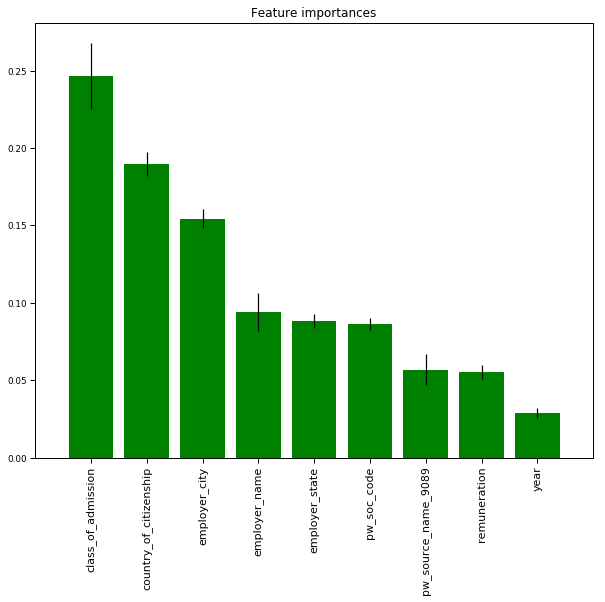

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
final_forest = RandomForestClassifier(n_estimators = 50, max_depth = 20, max_features = 4, random_state = 123, n_jobs = -1)
final_forest.fit(X_train, y_train)
importances = final_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in final_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.show()     

### Conclusion ###

According to the feature importances returned by Random Forest Classifier all of the chosen variables are significant for predicting Visa application decisions. Most informative features are: class of admission(Visa type), country of citizenship and employer related details like location, name and state.

### References ###
https://www.kaggle.com/nsharan/h-1b-visa<br>
https://www.dol.gov/<br>